In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import graphviz
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# Load Data

train_data = pd.read_csv("news-train-1.csv")
test_data = pd.read_csv("news-train-1.csv")

train_data

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [3]:
# Shuffle Data

train_data = train_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [4]:
# X/Y Split

train_data_x = train_data["Text"]
train_data_y = train_data["Category"]

test_data_x = test_data["Text"]

In [5]:
vectorizer = CountVectorizer()
train_data_x = vectorizer.fit_transform(train_data_x)
test_data_x = vectorizer.transform(test_data_x)

print(train_data_x.shape)
print(test_data_x.shape)

(1490, 24746)
(1490, 24746)


Depth: 1
Avg Train Acc: 0.32164429530201344	Avg Val Acc: 0.2859060402684564
Depth: 11
Avg Train Acc: 0.9110738255033558	Avg Val Acc: 0.7805369127516778
Depth: 21
Avg Train Acc: 0.9958053691275168	Avg Val Acc: 0.8020134228187918
Depth: 31
Avg Train Acc: 1.0	Avg Val Acc: 0.8100671140939598
Depth: 41
Avg Train Acc: 1.0	Avg Val Acc: 0.8134228187919463
Depth: 51
Avg Train Acc: 1.0	Avg Val Acc: 0.8147651006711409
Depth: 61
Avg Train Acc: 1.0	Avg Val Acc: 0.8114093959731544
Depth: 71
Avg Train Acc: 1.0	Avg Val Acc: 0.8174496644295302
Depth: 81
Avg Train Acc: 1.0	Avg Val Acc: 0.8060402684563759
Depth: 91
Avg Train Acc: 1.0	Avg Val Acc: 0.8053691275167786
Depth: 101
Avg Train Acc: 1.0	Avg Val Acc: 0.8140939597315435
Depth: 111
Avg Train Acc: 1.0	Avg Val Acc: 0.8073825503355703
Depth: 121
Avg Train Acc: 1.0	Avg Val Acc: 0.8114093959731544
Depth: 131
Avg Train Acc: 1.0	Avg Val Acc: 0.8020134228187918
Depth: 141
Avg Train Acc: 1.0	Avg Val Acc: 0.8093959731543624
Depth: 151
Avg Train Acc: 1.0	Avg V

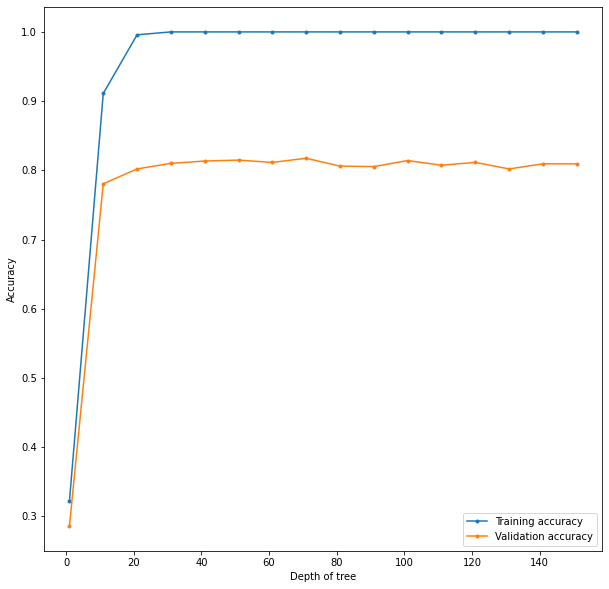

In [6]:
# Decision Tree
dt = None

def train_dt(depths, train_data_x, train_data_y):
    global dt
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)

    for d in depths:
        print(f"Depth: {d}")
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_data_x):
            train_x = train_data_x[train_index,:]
            val_x = train_data_x[val_index,:]

            train_y = train_data_y[train_index]
            val_y = train_data_y[val_index]

            dt = tree.DecisionTreeClassifier(max_depth=d, criterion="gini")
            dt.fit(train_x, train_y)

            train_acc.append(dt.score(train_x, train_y))
            val_acc.append(dt.score(val_x, val_y))

        avg_tacc = np.mean(np.array(train_acc))
        avg_vacc = np.mean(np.array(val_acc))

        print(f"Avg Train Acc: {avg_tacc}\tAvg Val Acc: {avg_vacc}")

        train_acc_all.append(avg_tacc)
        val_acc_all.append(avg_vacc)

    return train_acc_all, val_acc_all
    

# depths = [10, 25, 50, 75, 100, 125, 150]
dt_depths = [x for x in range(1,152,10)]
dt_tacc, dt_vacc = train_dt(dt_depths, train_data_x, train_data_y)

plt.plot(dt_depths, dt_tacc, marker='.', label="Training accuracy")
plt.plot(dt_depths, dt_vacc, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


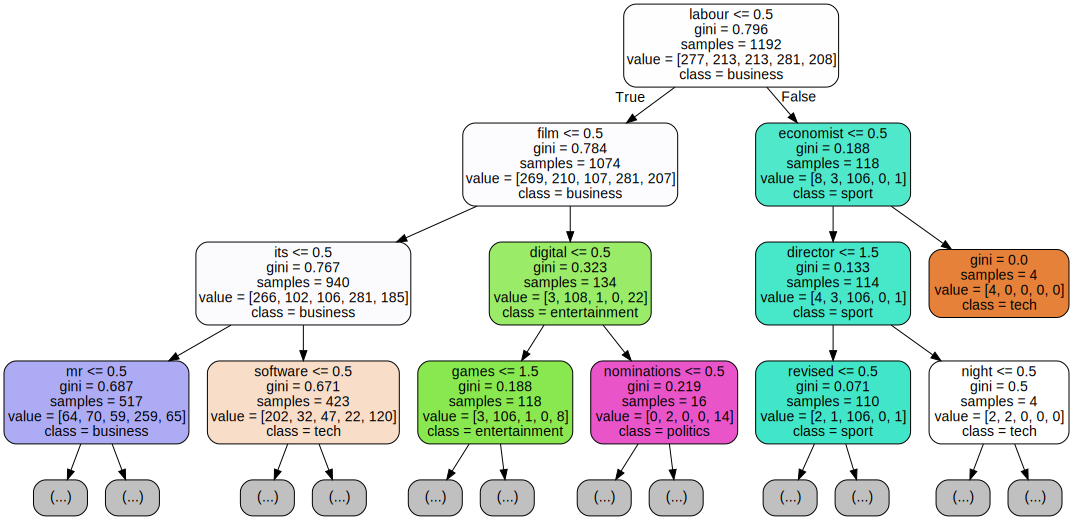

In [7]:
dot_data = tree.export_graphviz(dt, max_depth=3, filled=True, rounded=True, feature_names=vectorizer.get_feature_names(), class_names=list(set(list(train_data["Category"]))))
graph = graphviz.Source(dot_data)
graph

Depth: 1
Avg Train Acc: 0.5609060402684565	Avg Val Acc: 0.5503355704697988
Depth: 11
Avg Train Acc: 0.9895973154362416	Avg Val Acc: 0.9342281879194629
Depth: 21
Avg Train Acc: 0.9996644295302014	Avg Val Acc: 0.9436241610738255
Depth: 31
Avg Train Acc: 1.0	Avg Val Acc: 0.9409395973154362
Depth: 41
Avg Train Acc: 1.0	Avg Val Acc: 0.9422818791946309
Depth: 51
Avg Train Acc: 1.0	Avg Val Acc: 0.9429530201342281
Depth: 61
Avg Train Acc: 1.0	Avg Val Acc: 0.9436241610738254
Depth: 71
Avg Train Acc: 1.0	Avg Val Acc: 0.9442953020134228
Depth: 81
Avg Train Acc: 1.0	Avg Val Acc: 0.9510067114093961
Depth: 91
Avg Train Acc: 1.0	Avg Val Acc: 0.9395973154362416
Depth: 101
Avg Train Acc: 1.0	Avg Val Acc: 0.9416107382550336
Depth: 111
Avg Train Acc: 1.0	Avg Val Acc: 0.946979865771812
Depth: 121
Avg Train Acc: 1.0	Avg Val Acc: 0.948993288590604
Depth: 131
Avg Train Acc: 1.0	Avg Val Acc: 0.946979865771812
Depth: 141
Avg Train Acc: 1.0	Avg Val Acc: 0.9449664429530202
Depth: 151
Avg Train Acc: 1.0	Avg Val A

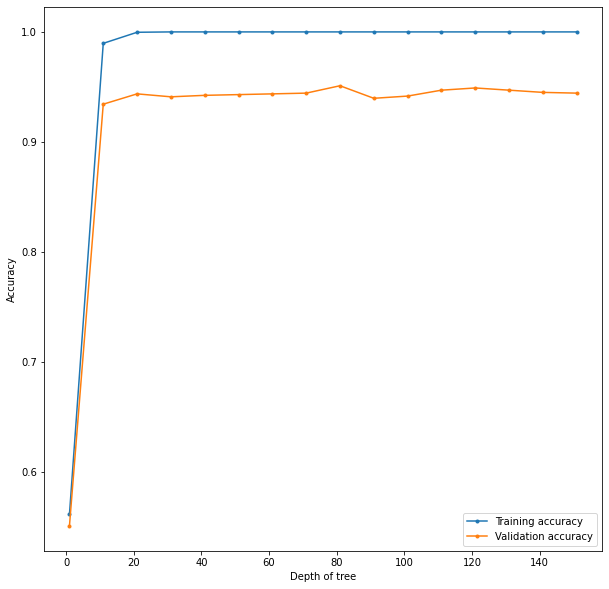

In [8]:
# Random Forest
rf = None


def train_rf(depths, train_data_x, train_data_y):
    global rf
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)

    for d in depths:
        print(f"Depth: {d}")
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_data_x):
            train_x = train_data_x[train_index,:]
            val_x = train_data_x[val_index,:]

            train_y = train_data_y[train_index]
            val_y = train_data_y[val_index]

            rf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=d)
            rf.fit(train_x, train_y)

            train_acc.append(rf.score(train_x, train_y))
            val_acc.append(rf.score(val_x, val_y))

        avg_tacc = np.mean(np.array(train_acc))
        avg_vacc = np.mean(np.array(val_acc))

        print(f"Avg Train Acc: {avg_tacc}\tAvg Val Acc: {avg_vacc}")

        train_acc_all.append(avg_tacc)
        val_acc_all.append(avg_vacc)

    return train_acc_all, val_acc_all
    

# depths = [10, 25, 50, 75, 100, 125, 150]
rf_depths = [x for x in range(1,152,10)]
rf_tacc, rf_vacc = train_rf(rf_depths, train_data_x, train_data_y)

plt.plot(rf_depths, rf_tacc, marker='.', label="Training accuracy")
plt.plot(rf_depths, rf_vacc, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
# Gradient Boosting Trees

gbt = None

def train_gbt(depths, train_data_x, train_data_y):
    global gbt
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)

    for d in depths:
        print(f"Depth: {d}")
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_data_x):
            train_x = train_data_x[train_index,:]
            val_x = train_data_x[val_index,:]

            train_y = train_data_y[train_index]
            val_y = train_data_y[val_index]

            gbt = GradientBoostingClassifier(n_estimators=25, criterion="squared_error", max_depth=d)
            gbt.fit(train_x, train_y)

            train_acc.append(gbt.score(train_x, train_y))
            val_acc.append(gbt.score(val_x, val_y))

        avg_tacc = np.mean(np.array(train_acc))
        avg_vacc = np.mean(np.array(val_acc))

        print(f"Avg Train Acc: {avg_tacc}\tAvg Val Acc: {avg_vacc}")

        train_acc_all.append(avg_tacc)
        val_acc_all.append(avg_vacc)

    return train_acc_all, val_acc_all
    

gbt_depths = [10, 25, 50, 75, 100, 125, 150]
gbt_tacc, gbt_vacc = train_gbt(gbt_depths, train_data_x, train_data_y)

plt.plot(gbt_depths, gbt_tacc, marker='.', label="Training accuracy")
plt.plot(gbt_depths, gbt_vacc, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

Depth: 1
Avg Train Acc: 0.9788590604026846	Avg Val Acc: 0.9288590604026845
Depth: 11


In [9]:
ret = rf.predict(test_data_x)

In [21]:
id_pred = list(zip(list(test_data["ArticleId"]), list(ret)))
id_pred = pd.DataFrame()
id_pred["ArticleId"] = test_data["ArticleId"]
id_pred["Pred"] = list(ret)
id_pred.set_index("ArticleId")

,Pred
ArticleId,
1761,sport
1453,tech
1308,sport
685,sport
1229,tech
...,...
1401,tech
1725,tech
307,sport


In [22]:
id_pred.to_csv("out.csv", header=False)